In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
import time
import openslide_generator
import importlib
importlib.reload(openslide_generator)

<module 'openslide_generator' from '/Users/quolc/pathology/chainerSVS/kerasrepo/openslide_generator.py'>

In [18]:
gen_train = openslide_generator.OpenSlideGenerator(
        './train.txt', './test_slides', 512, 256)

loaded 2 slide(s).
[0] desert1.tif
- 2 regions
- 22539142.5 px2
- patch scale: 300
- fetch probability (area mode): 0.9062157279151292
[1] desert2.tif
- 2 regions
- 7971891.0 px2
- patch scale: 450
- fetch probability (area mode): 0.09378427208487074
there are total 4 regions.
patches per epoch is set to 289.



In [40]:
# gen_train.fetch_mode = 'area'
# gen_train.fetch_mode = 'slide'
gen_train.fetch_mode = 'label'
# gen_train.fetch_mode = 'label-slide'
gen_train.reset_fetch_count()

In [41]:
t_start = time.time()
positions = dict()
for i in range(1000):
    if i % 100 == 0:
        print(i)
    _, label, (slide_id, region_id, posx, posy) = gen_train.get_example(i)
    if not slide_id in positions:
        positions[slide_id] = []
    positions[slide_id].append((posx, posy, label))
print(time.time() - t_start)

0
100
200
300
400
500
600
700
800
900
8.507094144821167


In [42]:
gen_train.total_loop_count

82

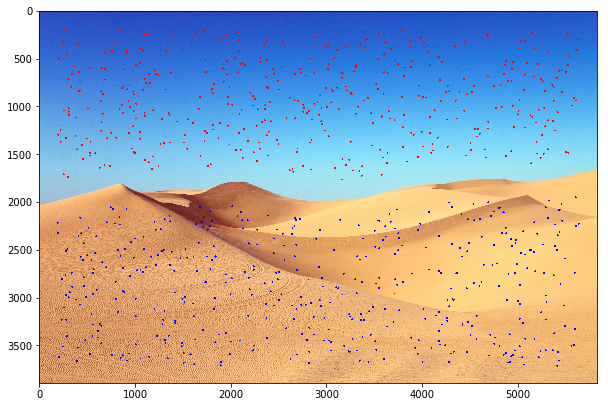

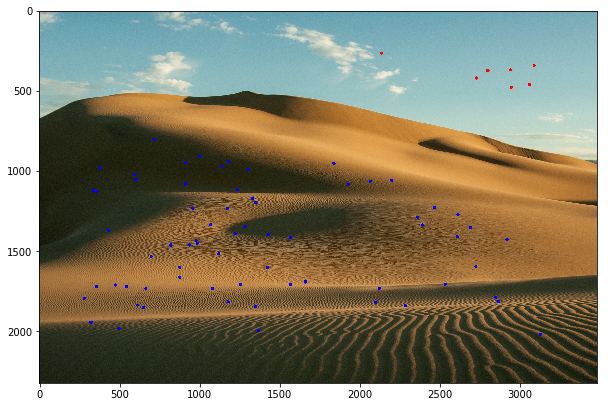

In [43]:
import cv2

images = ['./test_slides/desert1.jpg', './test_slides/desert2.jpg']

for i, filename in enumerate(images):
    image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    for posx, posy, label in positions[i]:
        if label == 0:
            cv2.circle(image, (int(posx), int(posy)), 10, (255,0,0), -1)
        else:
            cv2.circle(image, (int(posx), int(posy)), 10, (0,0,255), -1)

    plt.figure(figsize=(10,10))
    plt.imshow(image)

In [39]:
gen_train.fetch_count

[[230, 280], [31, 459]]

In [172]:
gen_train = openslide_generator.OpenSlideGenerator(
        './train.txt', './test_slides', 512, 256,
        blur=20)

loaded 2 slide(s).
[0] desert1.tif
- 2 regions
- 22539142.5 px2
- patch scale: 300
- fetch probability (area mode): 0.8917184858626199
[1] desert2.tif
- 2 regions
- 7971891.0 px2
- patch scale: 512
- fetch probability (area mode): 0.10828151413738
there are total 4 regions.
patches per epoch is set to 280.



283.337489767684
332.5922870088179
601.2229665373883
525.0319117391646
352.43455816538494
318.271951880688
285.1782977526115
356.57284444835267
341.13083657566216
325.2225176540111
267.99114798819545
606.8050215804209
340.33328057173924
269.19019682528784
257.95103634196175
475.6518369064418
311.73041567141354
307.93569634545753
253.06877678546056
270.35157417020594
302.00732548155867
441.7562786619798
493.38587063665403
245.52767447129077
457.5147149481354
346.47655284804597
336.82625331128787
286.5582333327001
262.17556830781064
334.98306425325836
273.9228306835565


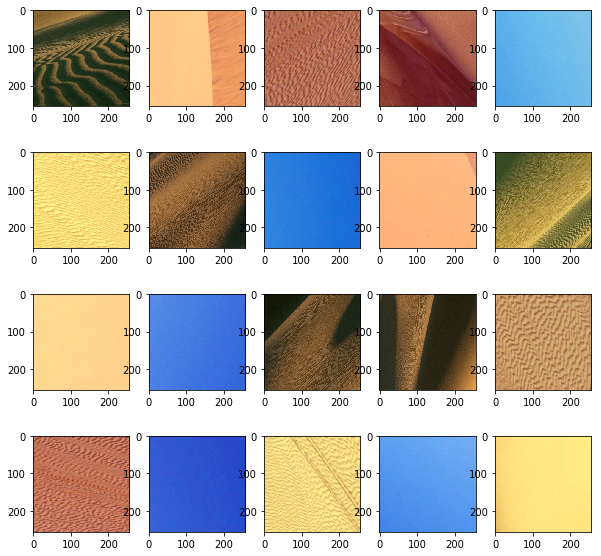

In [206]:
plt.figure(figsize=(10,10))
for i in range(20):
    image, label, (slide_id, region_id, posx, posy) = gen_train.get_example(i)
    plt.subplot(4,5,i+1)
    plt.imshow(image.transpose(1,2,0))

In [213]:
gen_train = openslide_generator.OpenSlideGenerator(
        './train.txt', './test_slides', 512, 256,
        he_augmentation=True, scale_augmentation=True,
        verbose=0)
gen_train.fetch_mode = 'slide'

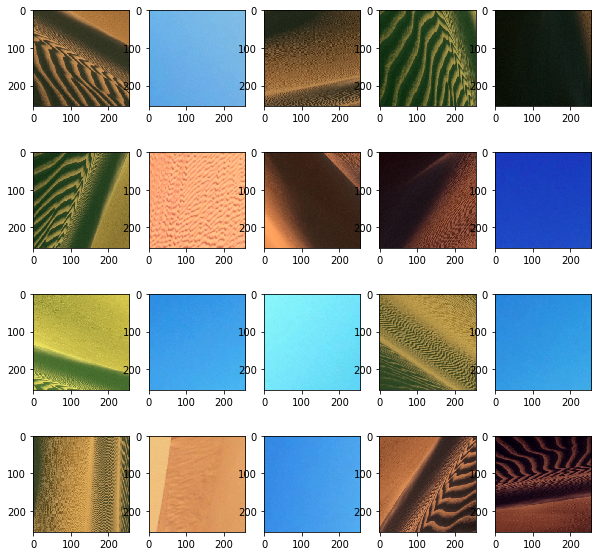

In [214]:
plt.figure(figsize=(10,10))
for i in range(20):
    image, label, (slide_id, region_id, posx, posy) = gen_train.get_example(i)
    plt.subplot(4,5,i+1)
    plt.imshow(image.transpose(1,2,0))

In [3]:
gen_train = openslide_generator.OpenSlideGenerator(
        './train.txt', './test_slides', 512, 256,
        he_augmentation=True, scale_augmentation=True,
        verbose=0)
gen_train.fetch_mode = 'slide'

In [4]:
gen_train.structure[0][0]

[(1, 21),
 (5835, 11),
 (5835, 1668),
 (5359, 1764),
 (5031, 1800),
 (4850, 1768),
 (4376, 1781),
 (4144, 1824),
 (3885, 1836),
 (3424, 1956),
 (2846, 1988),
 (2535, 1945),
 (2152, 1787),
 (1926, 1815),
 (1727, 1874),
 (1050, 1904),
 (839, 1809),
 (0, 2054)]

In [5]:
gen_train.shifted_structure[0][0]

[[5685, 1545],
 [5334, 1616],
 [5037, 1649],
 [4876, 1620],
 [4859, 1618],
 [4846, 1618],
 [4372, 1631],
 [4349, 1634],
 [4132, 1674],
 [3878, 1686],
 [3861, 1688],
 [3847, 1691],
 [3402, 1807],
 [2854, 1837],
 [2574, 1798],
 [2209, 1648],
 [2193, 1643],
 [2176, 1639],
 [2159, 1637],
 [2134, 1638],
 [1908, 1666],
 [1883, 1671],
 [1701, 1725],
 [1080, 1752],
 [901, 1672],
 [884, 1666],
 [868, 1662],
 [850, 1659],
 [833, 1659],
 [816, 1661],
 [797, 1665],
 [150, 1854],
 [151, 171],
 [5685, 161]]